# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Food was lousy. Who ever is pl...
1,✅ Trip Verified | Had the worst experience. Th...
2,✅ Trip Verified | The ground staff were not h...
3,✅ Trip Verified | Second time BA Premium Econ...
4,Not Verified | They changed our Flights from ...


In [8]:
df.to_csv("data.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
df['reviews'] = df['reviews'].str.strip()
df['reviews'] = df['reviews'].str.replace('Trip Verified \|', '').str.replace('✅', '')
df['reviews'] = df['reviews'].str.replace('Not Verified \|  ', '')

<ipython-input-9-a67a6d0076dc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('Trip Verified \|', '').str.replace('✅', '')
<ipython-input-9-a67a6d0076dc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('Not Verified \|  ', '')


In [10]:
df['reviews'] = df['reviews'].str.lower()

In [11]:
import spacy
import pandas as pd

# Load the English language model
nlp = spacy.load("en_core_web_sm")

adjectives_list = []
adverbs_list = []
proper_noun_list = []
for review in df['reviews']:
    doc = nlp(review)
    adjectives = [token.text for token in doc if token.pos_ == "ADJ"]
    adverbs = [token.text for token in doc if token.pos_ == "ADV"]
    proper_noun = [token.text for token in doc if token.pos_ == "PROPN"]
    adjectives_list.append(adjectives)
    adverbs_list.append(adverbs)
    proper_noun_list.append(proper_noun)

In [12]:
adj = sum(adjectives_list, [])
adv = sum(adverbs_list, [])
prop = sum(proper_noun_list, [])

In [13]:
adjective_data = pd.DataFrame(adj, columns=['adjective'])
adverb_data = pd.DataFrame(adv, columns=['adverb'])
proper_data = pd.DataFrame(prop, columns=['proper'])

In [14]:
top_20_adj = adjective_data['adjective'].value_counts().sort_values(ascending=False).head(20).reset_index()
top_20_adv = adverb_data['adverb'].value_counts().sort_values(ascending=False).head(20).reset_index()
top_20_proper = proper_data['proper'].value_counts().sort_values(ascending=False).head(20).reset_index()

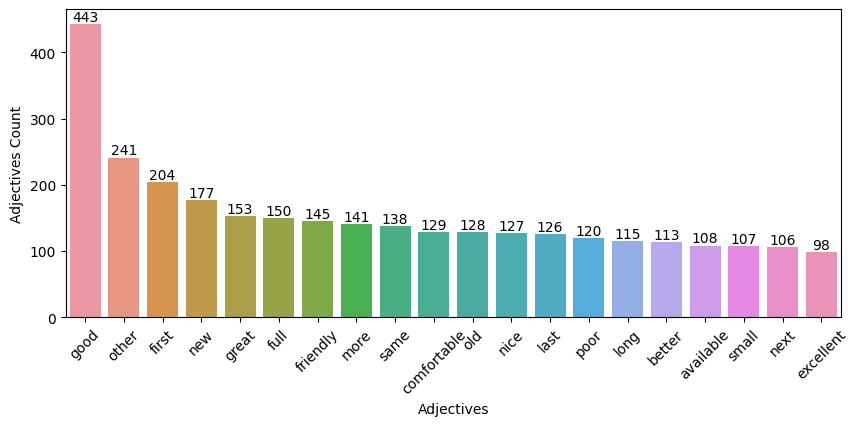

In [15]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=top_20_adj, x='index', y='adjective')
plt.xticks(rotation=45)
plt.xlabel('Adjectives')
plt.ylabel('Adjectives Count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


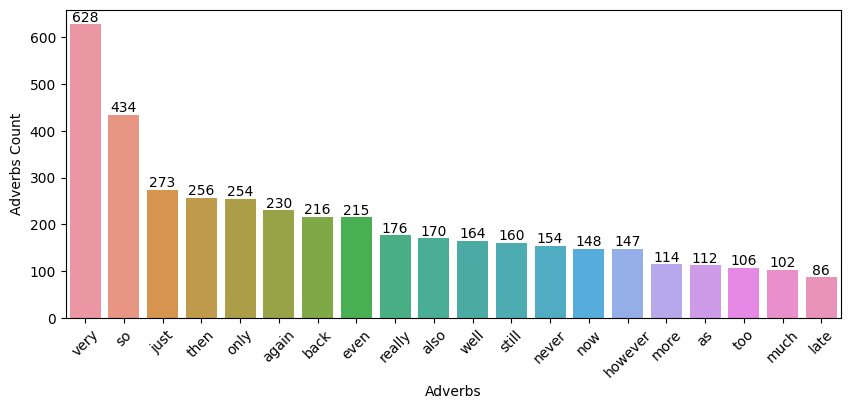

In [16]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=top_20_adv, x='index', y='adverb')
plt.xticks(rotation=45)
plt.xlabel('Adverbs')
plt.ylabel('Adverbs Count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


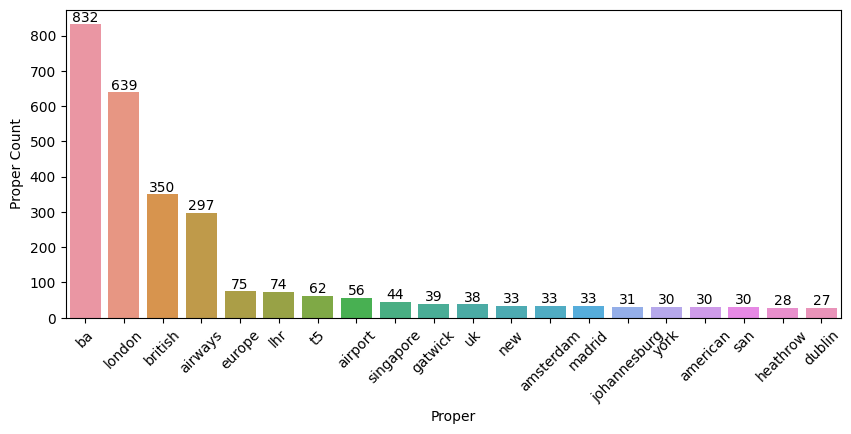

In [17]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=top_20_proper, x='index', y='proper')
plt.xticks(rotation=45)
plt.xlabel('Proper')
plt.ylabel('Proper Count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


In [18]:
reviews = list()
reviews.append(adj)
# reviews.append(adv)
# reviews.append(prop)
reviews = sum(reviews, [])
reviews = str(reviews)

In [19]:
reviews = reviews.replace('\\', '')
reviews = reviews.replace('\'', '')

In [20]:
!wget --quiet https://cdn.vectorstock.com/i/1000x1000/93/34/simple-black-plane-icon-on-white-background-vector-10919334.webp

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

stopwords = set(STOPWORDS)
mask = np.array(Image.open('simple-black-plane-icon-on-white-background-vector-10919334.webp'))

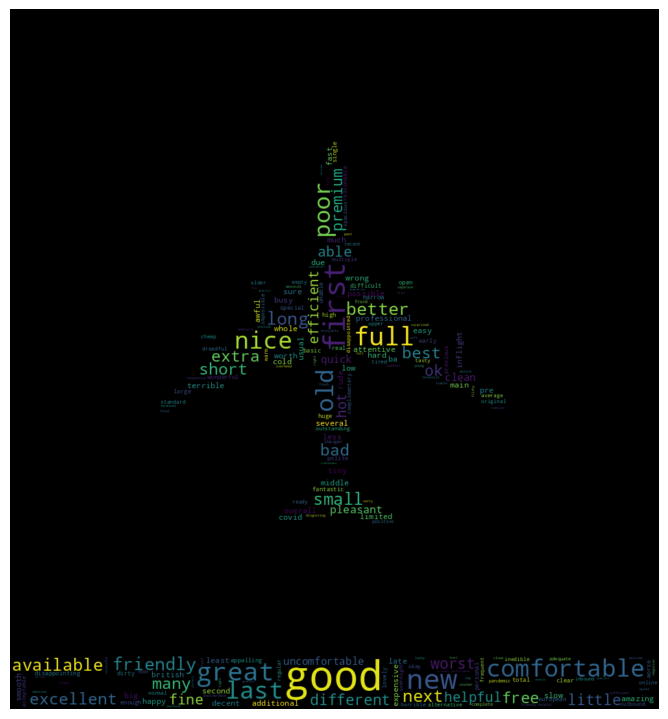

In [22]:
plt.figure(figsize=(12,7))
wordcloud = WordCloud(stopwords = stopwords, mask = mask, background_color = 'black').generate(''.join(reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()